In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import sys
import os
import plotly.graph_objects as go

import Binary_reader

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from scipy.linalg import svd
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE


# Read in Data as a Pandas Dataframe

In [2]:
folder_path = "/home/torps/CommSense/Datadump/Testing/Wheelchair_Testing/6/Bin/"
complete_data, original_data = Binary_reader.get_pandas_dataFrame(folder_path)
# complete_data

### Split the dataframe into a training and temp set. 

In [3]:
train_data, temp_test_data = train_test_split(complete_data, test_size=0.4, random_state=0)

# Creates a dataframe of possible label options

In [4]:
target1 = "Without Object"
target2 = "With Object"
target3 = "NA"
target4 = "NA"

# Separating out the target
y = complete_data.loc[:, ['Target']].values
y_labels = np.where(y == 0, target1, np.where(y==1, target2, np.where(y==2, target3, target4)))


lab = pd.DataFrame(y_labels,columns=['Target'])

### Define a seperate data variable equal to complete data.

In [5]:
data = complete_data
# data = normalize(complete_data)
data

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,Target
0,1.215409+2.766321j,1.186069+2.754156j,1.158161+2.744273j,1.134166+2.738373j,1.116569+2.738155j,1.106628+2.743836j,1.102874+2.753804j,1.103694+2.767020j,1.107479+2.782448j,1.112615+2.799049j,...,-1.511481+3.495061j,-1.499791+3.516908j,-1.499161+3.539608j,-1.508492+3.565354j,-1.522183+3.591754j,-1.534633+3.616414j,-1.540241+3.636940j,-1.533406+3.650940j,-1.512975+3.657552j,0
1,1.262803+2.772492j,1.232981+2.760217j,1.204227+2.750190j,1.178911+2.744361j,1.155970+2.744691j,1.137300+2.750315j,1.130065+2.759125j,1.129185+2.770673j,1.131862+2.784147j,1.137059+2.797892j,...,-1.465360+3.483270j,-1.455674+3.507387j,-1.458114+3.529789j,-1.466437+3.552451j,-1.477976+3.576162j,-1.487407+3.598123j,-1.486838+3.615508j,-1.467093+3.625029j,-1.440289+3.628769j,0
2,1.311866+2.777094j,1.283921+2.765768j,1.255450+2.756542j,1.228176+2.752357j,1.198960+2.753458j,1.172950+2.758041j,1.157452+2.766260j,1.153438+2.776318j,1.155591+2.787051j,1.162588+2.797173j,...,-1.422600+3.471328j,-1.420042+3.497081j,-1.423499+3.522270j,-1.430702+3.541486j,-1.438776+3.561068j,-1.440931+3.578859j,-1.424934+3.590349j,-1.395614+3.594739j,-1.361547+3.595804j,0
3,1.356820+2.779256j,1.333368+2.770294j,1.306877+2.763334j,1.276667+2.761438j,1.244877+2.762587j,1.215839+2.765929j,1.194195+2.771483j,1.185491+2.779621j,1.186636+2.787191j,1.191176+2.798910j,...,-1.385131+3.463696j,-1.386270+3.487601j,-1.388860+3.512052j,-1.390303+3.532400j,-1.391387+3.546327j,-1.381295+3.557737j,-1.354944+3.561994j,-1.320463+3.562444j,-1.282264+3.561204j,0
4,1.399102+2.780598j,1.379009+2.773580j,1.353820+2.769095j,1.323584+2.767227j,1.292149+2.767618j,1.263363+2.769910j,1.241076+2.773744j,1.229136+2.778764j,1.226576+2.785928j,1.228879+2.795478j,...,-1.337449+3.463140j,-1.338551+3.482789j,-1.340067+3.503235j,-1.338481+3.520818j,-1.330279+3.531875j,-1.311210+3.536034j,-1.281691+3.536238j,-1.245204+3.533805j,-1.205233+3.530055j,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,-2.611432+2.065119j,-2.571430+2.017389j,-2.527291+1.976823j,-2.474642+1.955693j,-2.417118+1.953466j,-2.355767+1.964180j,-2.290738+1.989664j,-2.218628+2.026838j,-2.139703+2.070227j,-2.053335+2.112793j,...,2.380757-3.341258j,2.301425-3.418298j,2.230994-3.486389j,2.171481-3.543020j,2.123460-3.590744j,2.081494-3.635501j,2.040783-3.684684j,2.006018-3.734370j,1.974271-3.782342j,1
5918,-2.643848+2.052083j,-2.599840+2.016697j,-2.549594+1.989061j,-2.493337+1.979639j,-2.432570+1.981293j,-2.367371+1.991639j,-2.298225+2.011159j,-2.224511+2.043077j,-2.142522+2.078672j,-2.054276+2.117723j,...,2.380496-3.332270j,2.302894-3.407527j,2.232058-3.477679j,2.168448-3.541793j,2.115048-3.596350j,2.067523-3.650084j,2.026661-3.705276j,1.992637-3.758779j,1.962243-3.810163j,1
5919,-2.671688+2.045516j,-2.623860+2.019813j,-2.569562+2.005881j,-2.510219+2.001255j,-2.446069+2.005144j,-2.377349+2.016757j,-2.304296+2.035305j,-2.227148+2.059997j,-2.144252+2.090498j,-2.054826+2.127094j,...,2.381727-3.324976j,2.304000-3.400025j,2.232553-3.470843j,2.167133-3.537736j,2.107483-3.601009j,2.056392-3.661798j,2.014884-3.720867j,1.980052-3.777971j,1.948989-3.832863j,1
5920,-2.698661+2.040484j,-2.642202+2.031311j,-2.580589+2.031023j,-2.515544+2.034311j,-2.447931+2.040796j,-2.376589+2.052876j,-2.302887+2.066562j,-2.223490+2.082705j,-2.134273+2.109379j,-2.039865+2.144498j,...,2.395136-3.311747j,2.317467-3.385440j,2.244396-3.456677j,2.173040-3.528813j,2.105416-3.597290j,2.048475-3.655506j,2.002932-3.712935j,1.963736-3.774034j,1.928495-3.834895j,1


# Displays the channel estimation from a single LTE frame 

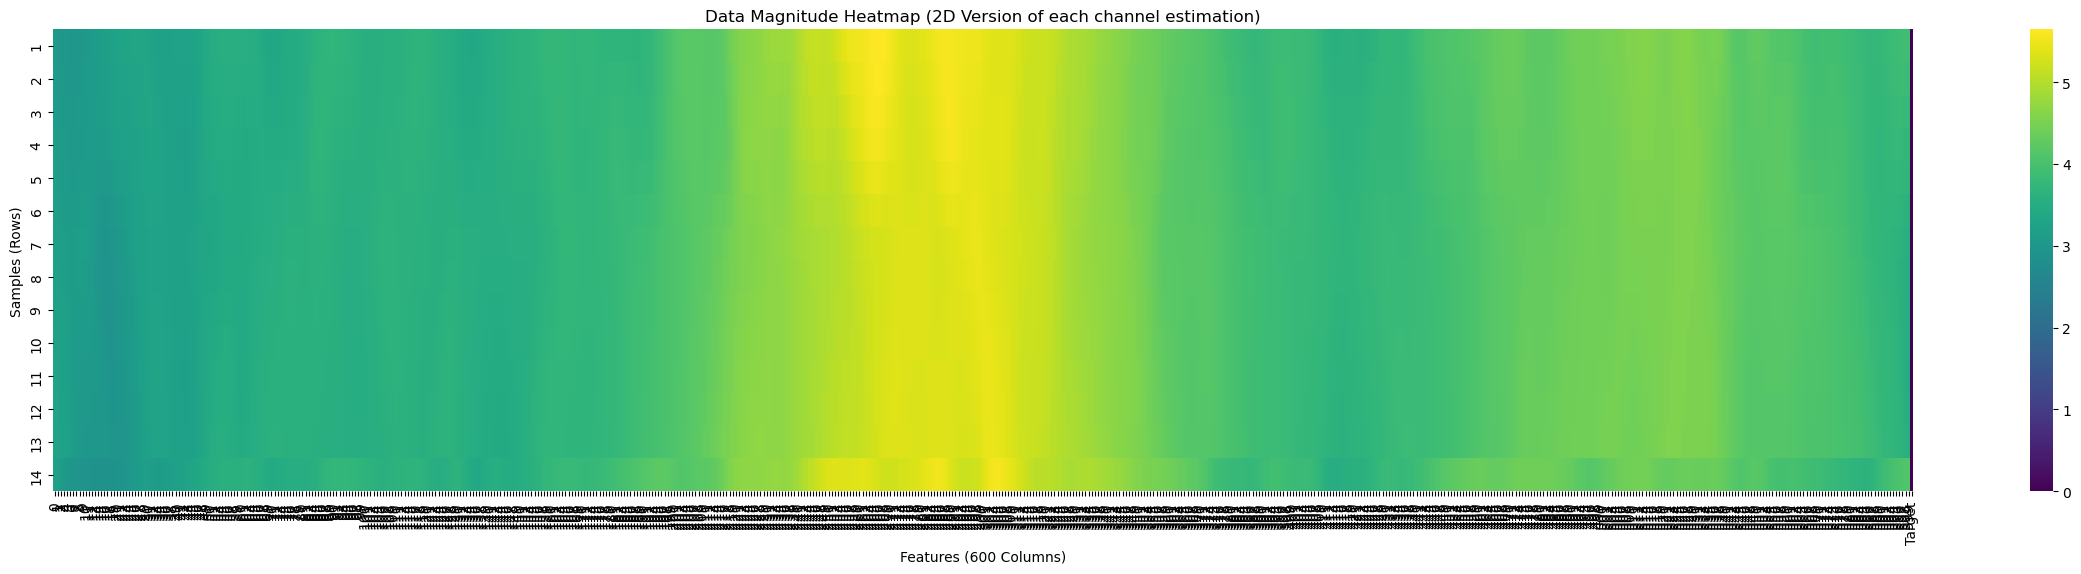

In [6]:
# Set up the figure
plt.figure(figsize=(30, 6))  # Adjust the figure size as needed
comp_abs_data = np.abs(complete_data)

sub_set = comp_abs_data.iloc[1:15,:]
# Create the heatmap
sns.heatmap(sub_set, cmap='viridis', xticklabels=True, yticklabels=True, cbar=True)

# Labels and title
plt.xlabel("Features (600 Columns)")
plt.ylabel("Samples (Rows)")
plt.title("Data Magnitude Heatmap (2D Version of each channel estimation)")

# Show the plot
plt.show()

# Splits the training set into dataset_0 and dataset_1
### dataset_0 contains all the 0 labelled data
### dataset_1 contains all the 1 labelled data


In [7]:
dataset_0 = train_data[train_data['Target'] == 0]
dataset_1 = train_data[train_data['Target'] == 1]

labels_0 = dataset_0.pop('Target')
labels_1 = dataset_1.pop('Target')

dataset_0=np.abs(dataset_0)
dataset_1=np.abs(dataset_1)

## Conform the Data
- Pops the training and data variables
- Takes absolute of the data
- Normalizes the data
- Collects data stats (Min, max, std dev, etc...)
- Displays Stats

In [8]:

def normalize(x):
    return (x-stats['min'])/ (stats['max'] - stats['min'])

Targets = train_data.pop('Target')
OG_Targets = complete_data.pop('Target')

data_var = np.abs(complete_data)

# data_var = norm_data
stats = data_var.describe().transpose()

# data_var = normalize(data_var)
data_var

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,3.021548,2.998689,2.978652,2.963953,2.957063,2.958591,2.966440,2.979017,2.994750,3.012074,...,3.793814,3.807890,3.823351,3.843997,3.871344,3.900992,3.928555,3.949643,3.959886,3.958128
1,3.046537,3.023084,3.002284,2.986862,2.978187,2.976186,2.981579,2.991937,3.005427,3.020116,...,3.766842,3.778948,3.797466,3.819097,3.843221,3.869541,3.893439,3.909295,3.910652,3.904151
2,3.071358,3.049250,3.028973,3.013949,3.003171,2.997099,2.998648,3.006387,3.017125,3.029157,...,3.738333,3.751521,3.774400,3.799044,3.819559,3.840740,3.858045,3.862777,3.856149,3.844947
3,3.092770,3.074476,3.056786,3.042272,3.030116,3.021362,3.017817,3.021868,3.029280,3.041841,...,3.714563,3.730386,3.753013,3.776697,3.796155,3.809513,3.816473,3.810994,3.799293,3.785020
4,3.112750,3.097485,3.082323,3.067478,3.054400,3.044419,3.038738,3.038470,3.043992,3.053661,...,3.699283,3.712427,3.731158,3.750791,3.766655,3.774094,3.771314,3.761344,3.746774,3.730130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,3.329308,3.268350,3.208587,3.154138,3.107811,3.067188,3.034179,3.005060,2.977275,2.946198,...,4.084366,4.102683,4.120839,4.139112,4.155517,4.171633,4.189210,4.212089,4.239060,4.266597
5918,3.346786,3.290324,3.233696,3.183662,3.137343,3.093715,3.053948,3.020366,2.985176,2.950390,...,4.079767,4.095215,4.112732,4.132352,4.152886,4.172189,4.194968,4.223319,4.254294,4.285760
5919,3.364826,3.311237,3.259786,3.210330,3.162887,3.117547,3.074451,3.033773,2.994662,2.957505,...,4.075985,4.089998,4.107138,4.126869,4.148740,4.172380,4.199704,4.231383,4.265403,4.299930
5920,3.383245,3.332785,3.283976,3.235179,3.187038,3.140458,3.094182,3.046566,3.000766,2.959717,...,4.075369,4.087094,4.102665,4.121399,4.144228,4.168126,4.190343,4.218722,4.254362,4.292495


In [9]:
selected_chunks = []

# Step of 28 to skip every other block
for start in range(0, len(data_var), 28):
    end = start + 14
    if end <= len(data_var):
        chunk = data_var.iloc[start:end]
        selected_chunks.append(chunk)

combined_df = pd.concat(selected_chunks, ignore_index=True)
data_var = combined_df

# Performs TSNE using the inbuilt python PCA method

#### Generates the PCA dataframe

In [10]:
# # Run t-SNE with 3 output dimensions
# tsne = TSNE(n_components=3, random_state=42, perplexity=30)
# tsne_components = tsne.fit_transform(data_var)

# # Create a DataFrame from the t-SNE result
# tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2', 'TSNE3'])

# # Concatenate with labels
# finalDf_tsne = pd.concat([tsne_df, lab], axis=1)

# finalDf_tsne

#### Displays the Results of the TSNE using a 3D Plot (3 components)

In [11]:

# # Create the 3D scatter plot
# fig = go.Figure()

# for target in finalDf_tsne['Target'].unique():
#     mask = finalDf_tsne['Target'] == target
#     fig.add_trace(
#         go.Scatter3d(
#             x=finalDf_tsne.loc[mask, 'TSNE1'],
#             y=finalDf_tsne.loc[mask, 'TSNE2'],
#             z=finalDf_tsne.loc[mask, 'TSNE3'],
#             mode='markers',
#             marker=dict(size=5),
#             name=str(target)
#         )
#     )

# # Set axis titles and layout
# fig.update_layout(
#     scene=dict(
#         xaxis_title='TSNE1',
#         yaxis_title='TSNE2',
#         zaxis_title='TSNE3'
#     ),
#     legend_title_text='Target'
# )

# fig.show()


In [12]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# # Create subplot grid: 1 row, 2 columns
# fig = make_subplots(rows=1, cols=2, subplot_titles=("TSNE1 vs TSNE2", "TSNE2 vs TSNE3"))

# # Plot TSNE1 vs TSNE2
# for target in finalDf_tsne['Target'].unique():
#     mask = finalDf_tsne['Target'] == target
#     fig.add_trace(
#         go.Scatter(
#             x=finalDf_tsne.loc[mask, 'TSNE1'],
#             y=finalDf_tsne.loc[mask, 'TSNE2'],
#             mode='markers',
#             name=str(target),
#             showlegend=True  # Show legend only in the first plot
#         ),
#         row=1, col=1
#     )

# # Plot TSNE2 vs TSNE3
# for target in finalDf_tsne['Target'].unique():
#     mask = finalDf_tsne['Target'] == target
#     fig.add_trace(
#         go.Scatter(
#             x=finalDf_tsne.loc[mask, 'TSNE2'],
#             y=finalDf_tsne.loc[mask, 'TSNE3'],
#             mode='markers',
#             name=str(target),
#             showlegend=False  # Avoid repeating legend
#         ),
#         row=1, col=2
#     )

# # Update layout and axis titles
# fig.update_layout(
#     height=500,
#     width=1000,
#     title_text="t-SNE 2D Comparisons",
# )

# fig.update_xaxes(title_text="TSNE1", row=1, col=1)
# fig.update_yaxes(title_text="TSNE2", row=1, col=1)

# fig.update_xaxes(title_text="TSNE2", row=1, col=2)
# fig.update_yaxes(title_text="TSNE3", row=1, col=2)

# fig.show()


In [13]:
from sklearn.manifold import TSNE
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

# Define perplexity values to iterate over
perplexity_values = [5, 10, 20, 30, 40, 50]

for perplexity in perplexity_values:
    print(f"Running t-SNE with perplexity={perplexity}...")

    # Run t-SNE
    tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
    tsne_components = tsne.fit_transform(data_var)

    # Create DataFrame from results
    tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2', 'TSNE3'])
    finalDf_tsne = pd.concat([tsne_df, lab], axis=1)

    # Create subplot
    fig = make_subplots(rows=1, cols=2, subplot_titles=("TSNE1 vs TSNE2", "TSNE2 vs TSNE3"))

    # TSNE1 vs TSNE2
    for target in finalDf_tsne['Target'].unique():
        mask = finalDf_tsne['Target'] == target
        fig.add_trace(
            go.Scatter(
                x=finalDf_tsne.loc[mask, 'TSNE1'],
                y=finalDf_tsne.loc[mask, 'TSNE2'],
                mode='markers',
                name=str(target),
                showlegend=True
            ),
            row=1, col=1
        )

    # TSNE2 vs TSNE3
    for target in finalDf_tsne['Target'].unique():
        mask = finalDf_tsne['Target'] == target
        fig.add_trace(
            go.Scatter(
                x=finalDf_tsne.loc[mask, 'TSNE2'],
                y=finalDf_tsne.loc[mask, 'TSNE3'],
                mode='markers',
                name=str(target),
                showlegend=False
            ),
            row=1, col=2
        )

    # Layout and axes
    fig.update_layout(
        height=500,
        width=1000,
        title_text=f"t-SNE 2D Comparisons (Perplexity = {perplexity})"
    )

    fig.update_xaxes(title_text="TSNE1", row=1, col=1)
    fig.update_yaxes(title_text="TSNE2", row=1, col=1)

    fig.update_xaxes(title_text="TSNE2", row=1, col=2)
    fig.update_yaxes(title_text="TSNE3", row=1, col=2)

    fig.show()


Running t-SNE with perplexity=5...


Running t-SNE with perplexity=10...


Running t-SNE with perplexity=20...


Running t-SNE with perplexity=30...


Running t-SNE with perplexity=40...


Running t-SNE with perplexity=50...
